In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Read the data frame
df = pd.read_csv("UsArrests.csv", index_col = "City")
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Statistical Exploration of the data 

In [2]:
# Display types of data within the columns of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [3]:
# Display the fromat of the data frame 
print('Number of cases: {} Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 50 Number of features: 4


In [4]:
# Identify the presence of any missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


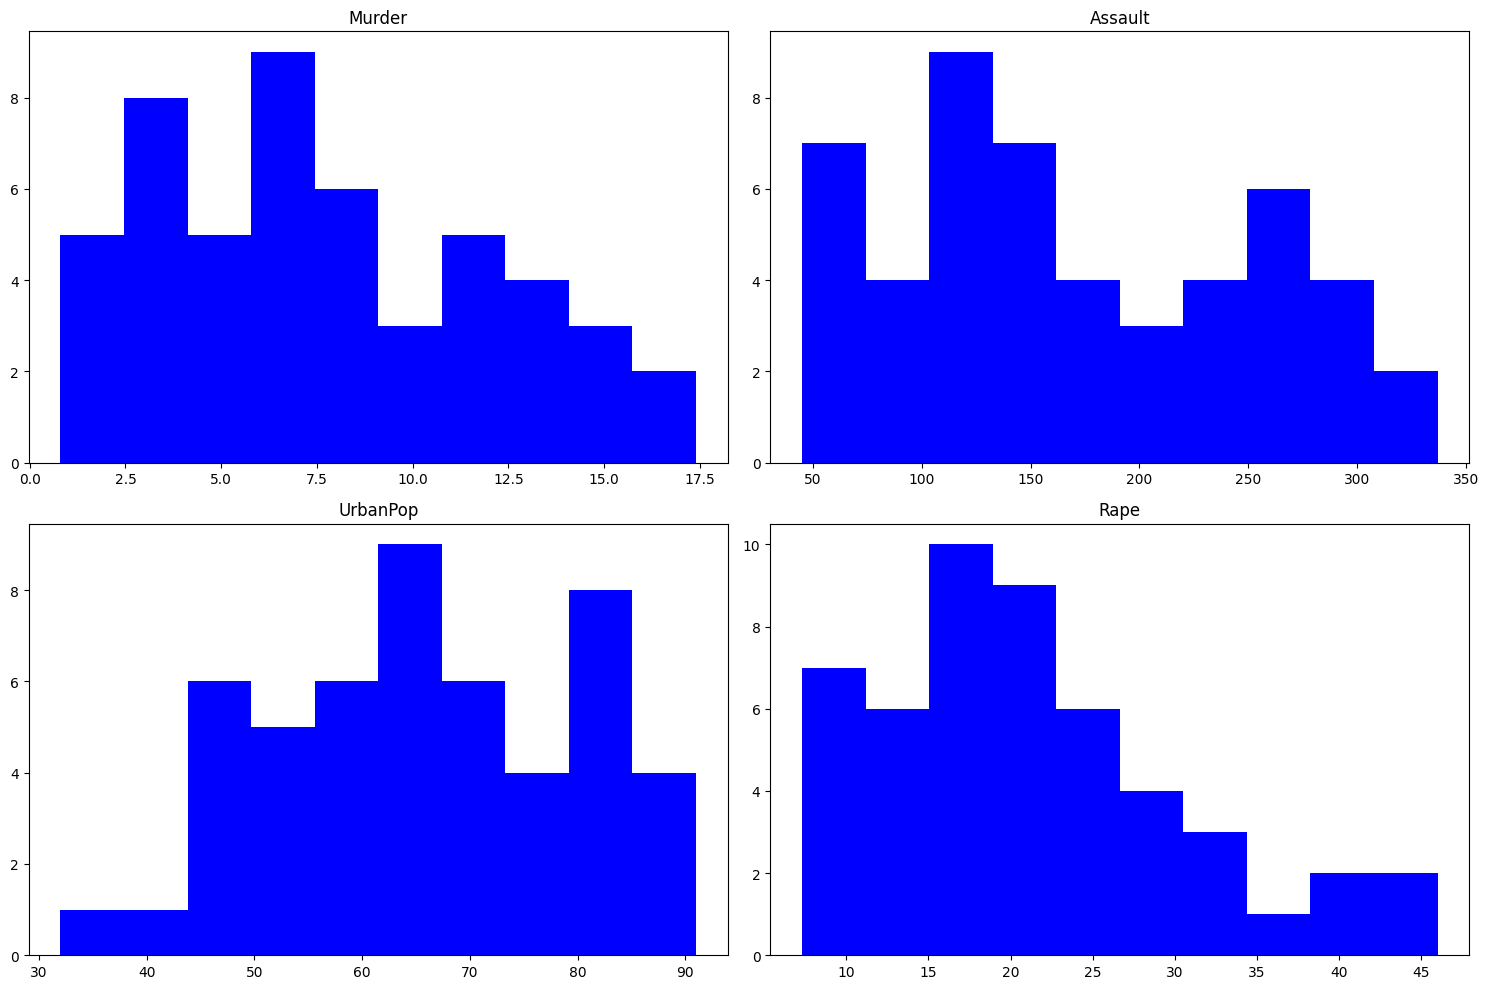

In [5]:
# Plot histograms of each column 
histograms = df.hist(color='blue',grid=False, figsize=(15, 10)) 
plt.tight_layout()
plt.show()

The visual representation in the format of histograms, shows the frequency distribution within each column, meaning that it shows how often a certain value within those columns occurs. For some columns, such as Murder and Assult, a somewhat bimodal distribution pattern can be noticed, which potentially foreshadows the geographical separation. Looking at UrbanPop and Rape histogram representations, the Rape histogram is Right-Skewed, showing that the mean is greater than the median value. The UrbanPop values show a Left-skewed histogram, indicating that the mean is less than the median.

In [6]:
# Dig deeper into the histogram presented column trends by creating a numerical table identifying statistical details of the columns
# Set the decimal precision, specifying the format of numbers to two desimal places 
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Using describe function, show the statistical properties of the columns
stats = df.describe()

# Identify which paramets of statistical information you wnat to be displayed 
selected_stats = stats.loc[["mean","std","min","max"]].transpose()


In [7]:
median = df.median()


In [8]:
# Create summary table
frames = [relevant_missing,selected_stats,median]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"median"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary

,missing,mean,std,min,max,median
Murder,0,7.79,4.36,0.80,17.40,7.25
Assault,0,170.76,83.34,45.00,337.00,159.00
UrbanPop,0,65.54,14.47,32.00,91.00,66.00
Rape,0,21.23,9.37,7.30,46.00,20.10


### Correlation Analysis of the data

<Axes: >

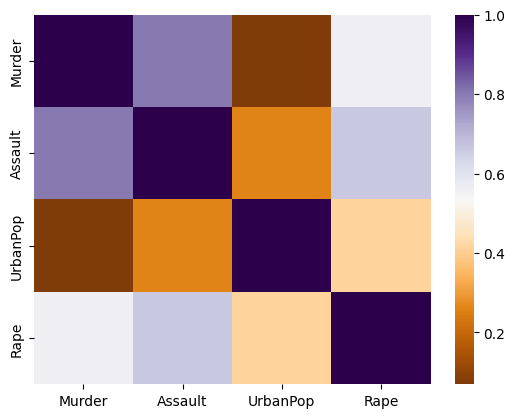

In [9]:
# Create a heatmap to represent the correlation patterns between the data frame variables 
corr_matrix=df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, cmap='PuOr')

In the plot, a strong positive correlation is represented by the color purple, representing that an increase in one variable corresponds to an increase in the other. Here strong correlations can be seen between Assault and Murder variables, as well as between Assault and Rape variables. It terms of UrbanPop influences, Rape shows a stronger positive correlation in comparison to Assult and Murder, however, Assault shows a stronger correlation than Murder.

### PCA 

In [10]:
# Import the PCA function 
from sklearn.decomposition import PCA 

# Identify the amount of decimal places for the future displayed numbers 
np.set_printoptions(precision=2)

# Remove the one-dimensional entry from the original shape of the array 
X = df.values.squeeze()
pca = PCA()
X_trans = pca.fit_transform(X)
df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.80,11.45,-2.49,2.41
1,92.83,17.98,20.13,-4.09
2,124.07,-8.83,-1.69,-4.35
3,18.34,16.70,0.21,-0.52
4,107.42,-22.52,6.75,-2.81


In [11]:
# Create a function for plotting a biplot 
city = df.index
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = city[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

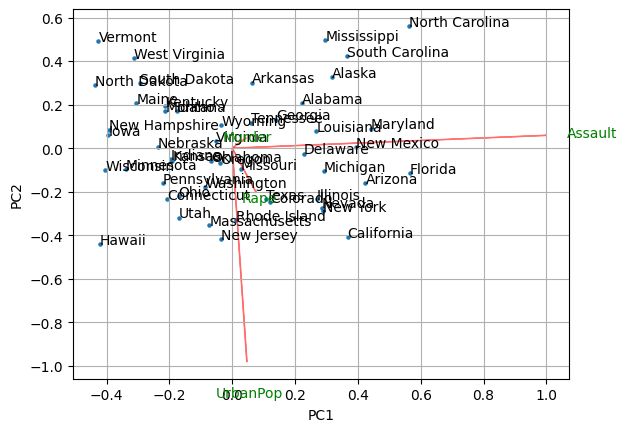

In [12]:
# Plot the biplot 
labels = df.columns
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(city))
plt.show()

As the information on the biplot is the projected observations, transcribed from the original data frame, it can be noticed that Assault and UrbanPop, are the two features that dominate the plot (according to the length of the arrows - representing importance).

In [13]:
# To further confirm this importance trend amoung variables, run a further statistical conformation 
# Increase the number of displayed decimals to spot the diffenrences more easily 
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
pc1 = abs( pca.components_[0] ) 
pc2 = abs( pca.components_[1] )

importance_df = pd.DataFrame()
importance_df["Variables"] = list(labels)
importance_df["PC1 Importance"] = pc1
importance_df["PC2 Importance"] = pc2
importance_df

,Variables,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


Looking at the Importance Table above, the Assault and UrbanPop variable does display high importance numbers in at least one PC column. However, looking at the original mean values displayed by all variables of this data frame, UrbanPop and Assault variables have the highest values( Assault = 170.76; UrbanPop = 65.54), causing the effect of other variables to be ignored. Due to this, we can standardize the data frame to "clean" the variables of such an ability to swamp other variables and look at their importance patterns again. 

### Standardised data

In [14]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


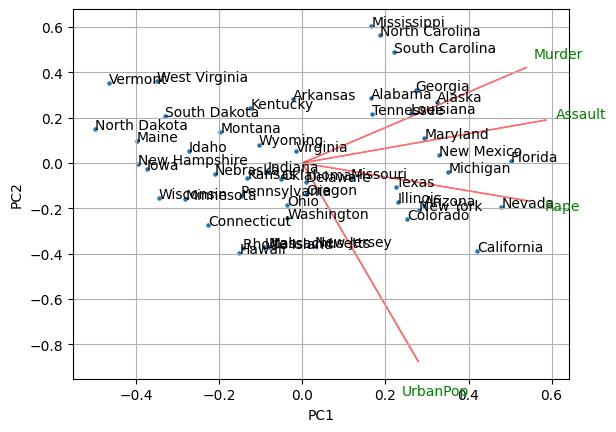

In [15]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

The length of the arrows seems to be somewhat even among the variables, underlying the absence of the large number domination effect. 

In [16]:
# Statistical conforamtion of the importance trends amoung variables

pc1 = abs( std_pca.components_[0] ) 
pc2 = abs( std_pca.components_[1] )

importance_df = pd.DataFrame()
importance_df["Variables"] = list(labels)
importance_df["PC1 Importance"] = pc1
importance_df["PC2 Importance"] = pc2
importance_df

,Variables,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


It is now seen that variables represent an overall equal spread in importance, with the exception of only few values within the columns(either being too small or too large).

Text(0.5, 1.0, 'Cumulative Explained Variance')

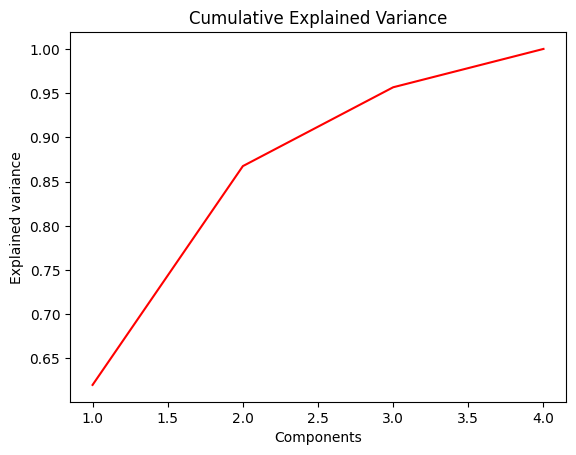

In [17]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

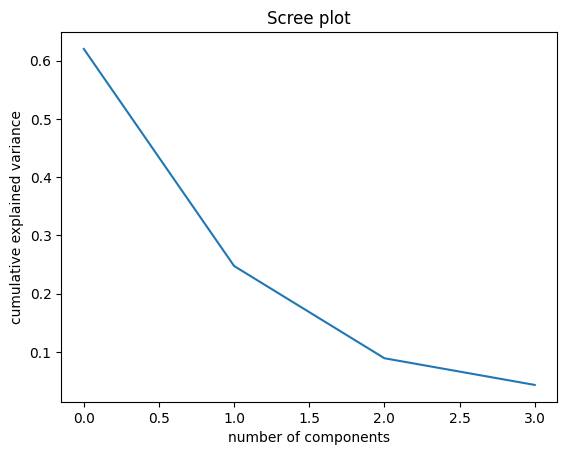

In [18]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first 3 principal components together explain around 95% of the variance. We can therefore perform dimensionality reduction, and use them for cluster analysis. 

In [19]:
pca_df = pd.DataFrame(X_std_trans[:,0:3], index = df.index)
pca_df.head()

,0,1,2
City,,,
Alabama,0.986,1.133,-0.444
Alaska,1.950,1.073,2.040
Arizona,1.763,-0.746,0.055
Arkansas,-0.141,1.120,0.115
California,2.524,-1.543,0.599


## Hierarchical clustering

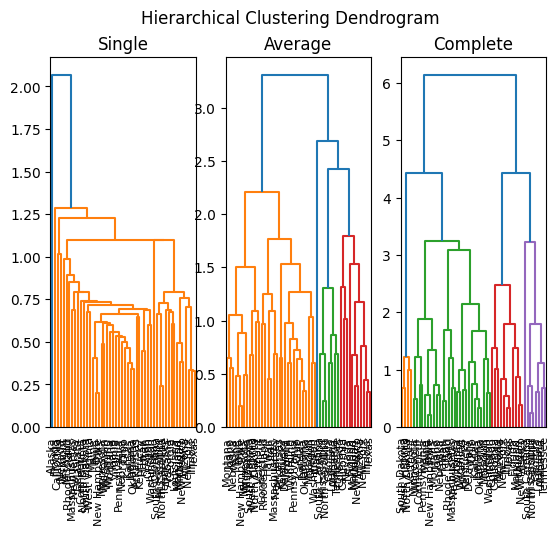

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single', metric='euclidean', optimal_ordering=False), labels=pca_df.index, ax=ax1) 
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average', metric='euclidean', optimal_ordering=False), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3) 
plt.show()

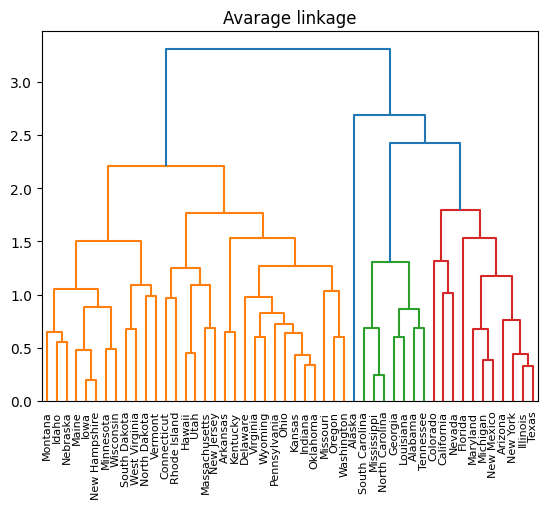

In [38]:
# I chose this as a final representation of the Hierarchical clustering of the PCA applied data, as it shows the most variable 
# distance across the y axis of the dendrogram model, represnting the high dissimilarity between the groups. 
plt.title("Avarage linkage")
dendrogram(linkage(pca_df, method='average', metric='euclidean'), labels=pca_df.index)
plt.show()

/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


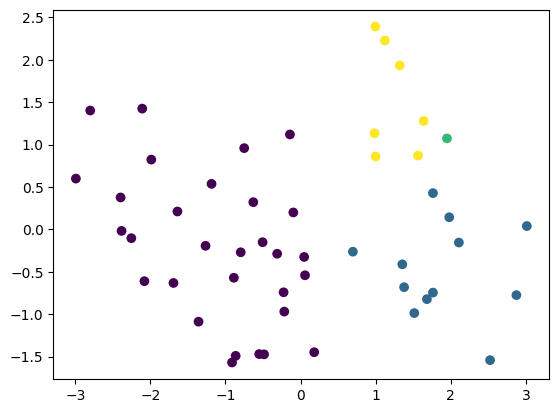

In [43]:
# Use the AgglomerativeClustering function to obtain a cluster plot form the above chosen Hierarchical cluster
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
cluster_1 = cluster.fit_predict(X_std_trans)
plt.scatter(X_std_trans[:,0], X_std_trans[:,1], c=cluster.labels_)

In [50]:
# Import the silhouette_score function to obtain the score for the Hierarchical cluster plot above 
from sklearn.metrics import silhouette_score
silhouette_score_hierarchical_clustering = round(silhouette_score(X_std_trans, cluster_1, metric='euclidean'),2)
print("The silhouette score for the Average linkage Hierarchical cluster plot:", silhouette_score_hierarchical_clustering)

The silhouette score for the Average linkage Hierarchical cluster plot: 0.36


### K-means clustering

/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


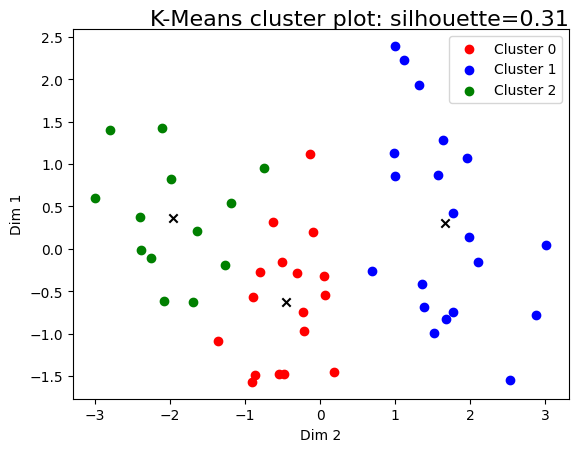

In [47]:
# Import the silhouette_score function and the KMeans function 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Visualisation of clusters of the data frame 
def scatter_Kmeans(x, k, r = 123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(pca_df)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    score = round(silhouette_score(X_std_trans, kmeans.labels_, metric='euclidean'), 2)
    plt.title('K-Means cluster plot: silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Dim 2')
    plt.ylabel('Dim 1')
    plt.legend()
    plt.show()
    
scatter_Kmeans(X_std_trans, k = 3, r = 123)

/usr/local/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


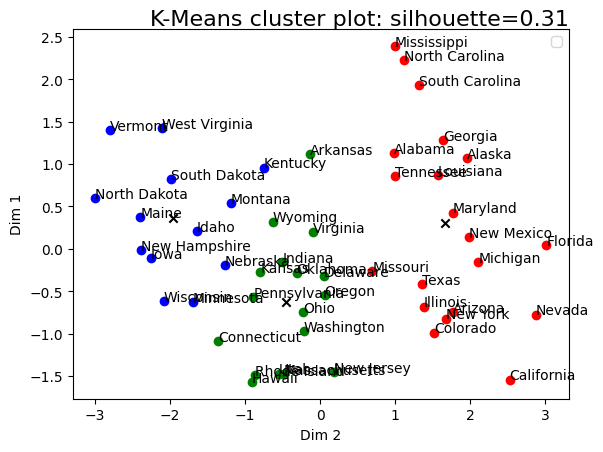

In [23]:
# Extract the first two components from the reshaped dataframe 
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means 
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 
    ax.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='x', c = 'black')

for i in range(0,len(x)):
        txt = city[i]
        ax.annotate(txt, (x[i], y[i]))
score = round(silhouette_score(X_std_trans, kmeans.labels_, metric='euclidean'), 2)


ax.set_title('K-Means cluster plot: silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

I have created two K-Means cluster plots, in the first one I wanted to clearly show by the usage of  'x' markings the clusters, and their positioning and distances from each other (overlappings). On the second K-Means cluster plot, I wanted to identify, and visually represent the points within the clusters connecting them with the cities of the data frame.

Looking at both types of clustering visualizations, the Hierarchical clustering and the K-Mens cluster plot, it can be noticed that both result in 3 visibly distinguishable clusters. In the K-Means cluster plot those clusters are marked by 'x', whereas, in Hierarchical clustering, color coordination can be used to identify 3 clusters. In Hierarchical clustering, a potential fourth cluster could've been identified but the line leads to a single city name "Alaska", so the cluster could be counted as dismissed, as shows no variation. The silhouette scores for both the Hierarchical clustering and the K-Mens cluster plot, are closer to 0 than to 1, this denotes the overlapping of clusters. Identifying that the distance between the presented clusters is very similar. I believe that due to this close cluster overlap both of the clustering visualizations produced slightly different versions of the cluster orientation.